In [ ]:
#Tugas 1
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('EmployeeAnalysis').getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Thomas', 25, 'M', 2900, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

24/11/09 08:37:14 WARN Utils: Your hostname, codespaces-0b2edf resolves to a loopback address: 127.0.0.1; using 10.0.2.127 instead (on interface eth0)
24/11/09 08:37:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/09 08:37:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+------+---+------+------+------+
|  Name|Age|Gender|Salary|DeptId|
+------+---+------+------+------+
| James| 34|     M|  3000|     1|
|  Anna| 28|     F|  4100|     2|
|   Lee| 23|     M|  2700|     1|
|Thomas| 25|     M|  2900|     1|
+------+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+-----------+
|avg(Salary)|
+-----------+
|     3175.0|
+-----------+



24/11/09 08:37:27 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [4]:
#Tugas 2
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age        
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     M|       2900| 25|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [5]:
# 1. Cari rata-rata gaji per departemen.
spark.sql('SELECT * FROM employees').show()
print('Rata rata per departemen')
spark.sql('''
SELECT DeptId, AVG(Salary) as avgSalary
FROM employees
GROUP BY DeptId
''').show()


+------+---+------+------+------+
|  Name|Age|Gender|Salary|DeptId|
+------+---+------+------+------+
| James| 34|     M|  3000|     1|
|  Anna| 28|     F|  4100|     2|
|   Lee| 23|     M|  2700|     1|
|Thomas| 25|     M|  2900|     1|
+------+---+------+------+------+

Rata rata per departemen
+------+------------------+
|DeptId|         avgSalary|
+------+------------------+
|     1|2866.6666666666665|
|     2|            4100.0|
+------+------------------+



In [7]:
# 2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
spark.sql('SELECT * FROM employees').show()

print('Rata rata tiap gender')
spark.sql('''
SELECT Gender, AVG(Salary) as avgSalary
FROM employees
GROUP BY Gender
''').show()

print('Karyawan yg gajinya diatas rata rata untuk tiap gender')
spark.sql('''
SELECT e.Name, e.Gender, e.Salary
FROM employees e
JOIN (
    SELECT Gender, AVG(Salary) as avgSalary
    FROM employees
    GROUP BY Gender
) AS avgPerGender
ON e.Gender = avgPerGender.Gender
WHERE e.Salary > avgPerGender.avgSalary
''').show()

+------+---+------+------+------+
|  Name|Age|Gender|Salary|DeptId|
+------+---+------+------+------+
| James| 34|     M|  3000|     1|
|  Anna| 28|     F|  4100|     2|
|   Lee| 23|     M|  2700|     1|
|Thomas| 25|     M|  2900|     1|
+------+---+------+------+------+

Rata rata tiap gender
+------+------------------+
|Gender|         avgSalary|
+------+------------------+
|     F|            4100.0|
|     M|2866.6666666666665|
+------+------------------+

Karyawan yg gajinya diatas rata rata untuk tiap gender
+------+------+------+
|  Name|Gender|Salary|
+------+------+------+
| James|     M|  3000|
|Thomas|     M|  2900|
+------+------+------+



In [9]:
# 3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.
spark.sql('SELECT * FROM employees').show()

print('Ranking karyawan berdasarkan gaji dalam departemen mereka')
spark.sql('''
SELECT Name, DeptId, Salary, DENSE_RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS rank
FROM employees
ORDER BY DeptId, rank
''').show()

+------+---+------+------+------+
|  Name|Age|Gender|Salary|DeptId|
+------+---+------+------+------+
| James| 34|     M|  3000|     1|
|  Anna| 28|     F|  4100|     2|
|   Lee| 23|     M|  2700|     1|
|Thomas| 25|     M|  2900|     1|
+------+---+------+------+------+

Ranking karyawan berdasarkan gaji dalam departemen mereka
+------+------+------+----+
|  Name|DeptId|Salary|rank|
+------+------+------+----+
| James|     1|  3000|   1|
|Thomas|     1|  2900|   2|
|   Lee|     1|  2700|   3|
|  Anna|     2|  4100|   1|
+------+------+------+----+



In [11]:
#Tugas 4 : Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.
# Data setup for complex SQL queries
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Anno', 28, 'M', 4150, 2),
    ('Annu', 35, 'F', 4300, 1),
    ('Anne', 22, 'F', 2500, 1),
    ('Thomas', 23, 'M', 2700, 1),
    ('John', 80, 'F', 4700, 2),
    ('Arthur', 80, 'M', 5000, 2)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

#Tugas 5: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId''').show()

+------+---+---------+-----------+
|  Name|Age| DeptName|ProjectName|
+------+---+---------+-----------+
|Thomas| 23|       HR|  Project A|
|  Anne| 22|       HR|  Project A|
|  Annu| 35|       HR|  Project A|
| James| 34|       HR|  Project A|
|Arthur| 80|Marketing|  Project B|
|  John| 80|Marketing|  Project B|
|  Anno| 28|Marketing|  Project B|
|  Anna| 28|Marketing|  Project B|
+------+---+---------+-----------+

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   3125.0|
|     2|   4487.5|
+------+---------+



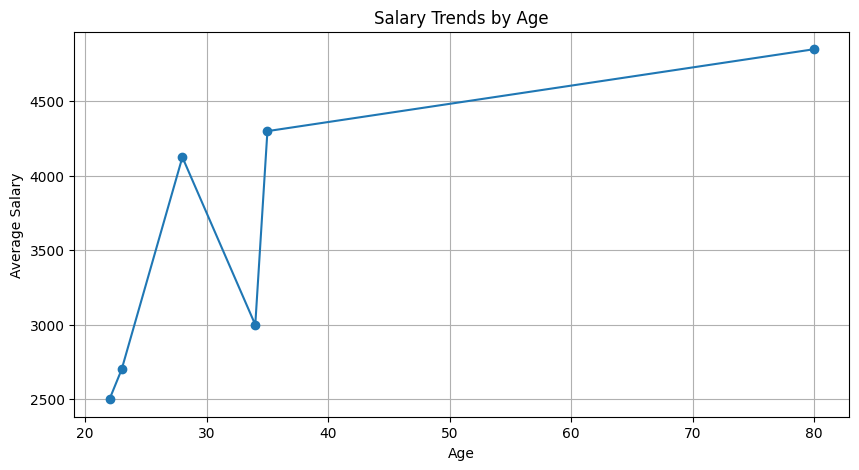

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

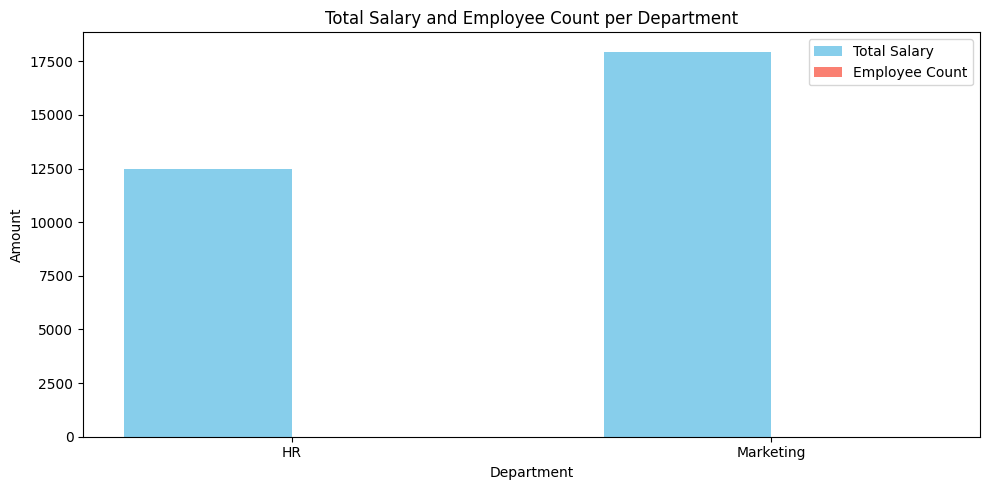

In [13]:
#Tugas 1 : Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
result = spark.sql('''
SELECT d.DeptName,
       SUM(e.Salary) AS TotalSalary,
       COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

result_pd = result.toPandas()

plt.figure(figsize=(10, 5))
bar_width = 0.35
index = range(len(result_pd))

# Membuat dua bar plot untuk total gaji dan jumlah karyawan
plt.bar(index, result_pd['TotalSalary'], bar_width, label='Total Salary', color='skyblue')
plt.bar([i + bar_width for i in index], result_pd['EmployeeCount'], bar_width, label='Employee Count', color='salmon')

plt.xlabel('Department')
plt.ylabel('Amount')
plt.title('Total Salary and Employee Count per Department')
plt.xticks([i + bar_width / 2 for i in index], result_pd['DeptName'])
plt.legend()
plt.tight_layout()
plt.show()

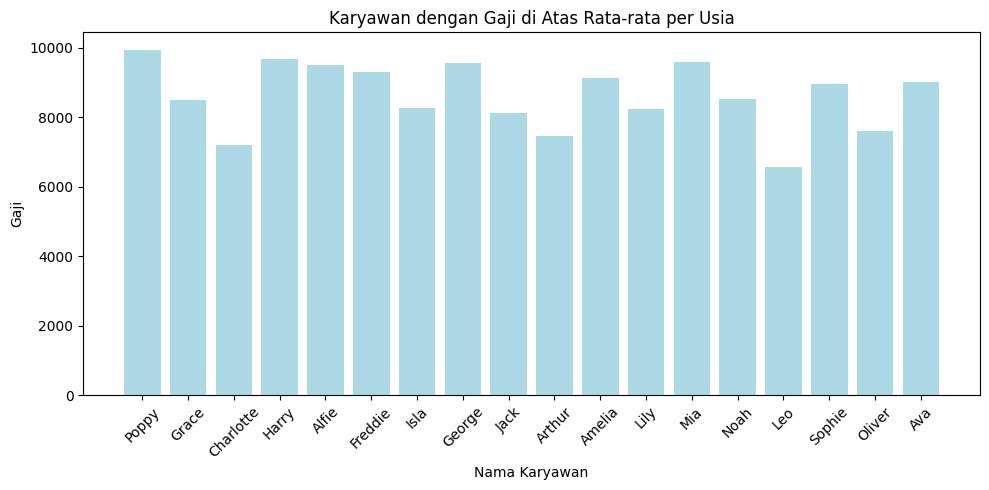

In [18]:
# Tugas 2 : Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
avg_salary = spark.sql('''
SELECT Age, Name, Salary,
       AVG(Salary) OVER (PARTITION BY Age) AS AvgSalary
FROM employees
''')

above_avg_salary = (
    avg_salary.filter(avg_salary.Salary > avg_salary.AvgSalary)
)

above_avg_salary_pd = above_avg_salary.toPandas()


plt.figure(figsize=(10, 5))
plt.bar(above_avg_salary_pd['Name'], above_avg_salary_pd['Salary'], color='lightblue')
plt.xlabel('Nama Karyawan')
plt.ylabel('Gaji')
plt.title('Karyawan dengan Gaji di Atas Rata-rata per Usia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

24/11/09 08:43:54 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+---------+-------------+-----------+-----------------+
| DeptName|EmployeeCount|TotalSalary|        AvgSalary|
+---------+-------------+-----------+-----------------+
|    Sales|           22|     146366|           6653.0|
|       HR|           26|     159267|6125.653846153846|
|  Finance|           17|     103448|6085.176470588235|
|Marketing|           20|     116196|           5809.8|
|       IT|           15|      92905|6193.666666666667|
+---------+-------------+-----------+-----------------+



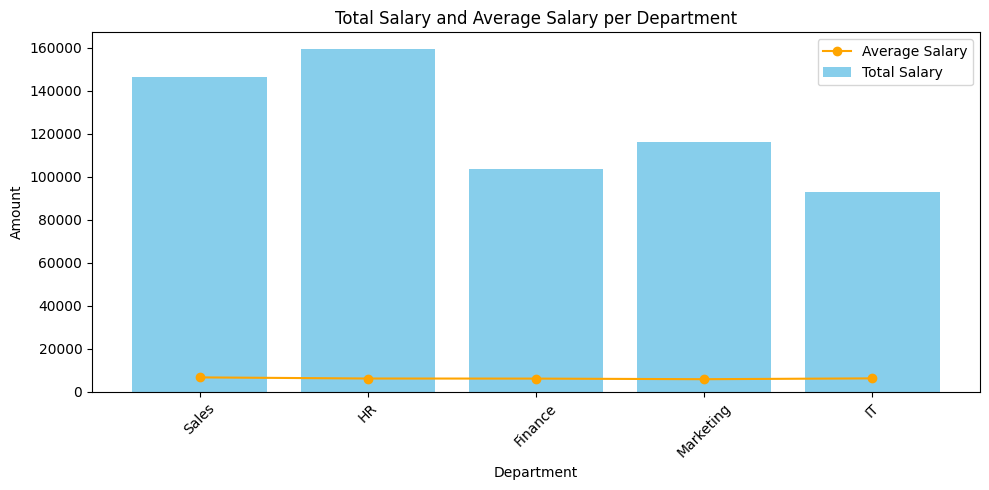

In [17]:
# 3. Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti SUM(), AVG(), COUNT(), serta JOIN antar tabel serta buat visualisasi yang menarik.
import random
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('CreateDataset').getOrCreate()

names = ['Oliver', 'Charlotte', 'James', 'Isla', 'Jack', 'Ava', 'Harry', 'Mia', 'George', 'Amelia',
'Noah', 'Poppy', 'Leo', 'Lily', 'Alfie', 'Sophie', 'Arthur', 'Ella', 'Freddie', 'Grace']

departments = ['HR', 'Marketing', 'Finance', 'IT', 'Sales']
data = []
for _ in range(100):
    name = random.choice(names)
    age = random.randint(20, 50)
    gender = 'M' if random.random() > 0.5 else 'F'
    salary = random.randint(2500, 10000)
    dept_id = random.randint(1, len(departments))  # Assuming we have 5 departments
    data.append((name, age, gender, salary, dept_id))

df = spark.createDataFrame(data, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

df.createOrReplaceTempView('employees')

departments_data = [
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'Finance'),
    (4, 'IT'),
    (5, 'Sales')
]
departments_df = spark.createDataFrame(departments_data, ['DeptId', 'DeptName'])
departments_df.createOrReplaceTempView('departments')

result = spark.sql('''
SELECT d.DeptName,
       COUNT(e.Name) AS EmployeeCount,
       SUM(e.Salary) AS TotalSalary,
       AVG(e.Salary) AS AvgSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

result.show()

result_pd = result.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(result_pd['DeptName'], result_pd['TotalSalary'], label='Total Salary', color='skyblue')
plt.plot(result_pd['DeptName'], result_pd['AvgSalary'], label='Average Salary', marker='o', color='orange')

plt.xlabel('Department')
plt.ylabel('Amount')
plt.title('Total Salary and Average Salary per Department')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()